### SISTEMAS INTELIGENTES II

### PARCIAL - I (Parte II)


#### 1. Espacio para las respuestas a las preguntas de la primera parte


Pregunta 1.


Pregunta 2.


Pregunta 3.


Pregunta 4.


Pregunta 5.


Pregunta 6.


Pregunta 7.


Pregunta 8.


Pregunta 9.


Pregunta 10.


---


#### 2. Análisis multivariado (valor = 1.5)

Dataset: OrdenOnlineRestaurante.csv<br>
Objetivo: El objetivo de este análisis es comprender cómo las variables demográficas y de ubicación pueden influir en el comportamiento de pedido de comida en línea, específicamente en la situación actual del pedido o el feedback del cliente.<br>

1. Preprocesamiento de datos: Comienza por preprocesar los datos, asegurándote de manejar valores faltantes, codificar variables categóricas y normalizar las variables si es necesario.


In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore")

In [119]:
data = pd.read_csv("OrdenOnlineRestaurante.csv", sep=",")
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [121]:
"""
    Aca se puede visualizar que la edad promedios de los compradores
    El estado civil
    El genero de cada comprador
    Tamaño de la familia
    
"""
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [122]:
data.head()
MS = data["Marital Status"].value_counts()
ED = data["Educational Qualifications"].value_counts()
FS = data["Family size"].value_counts()
MI = data["Monthly Income"].value_counts()
print(f"Total de categoria en Estado civil: {MS} \n")
print(f"Total de categoria en Educacion: {ED} \n")
print(f"Total de categoria en Familia: {FS} \n")
print(f"Total de categoria en Ingreso mensual: {MI} \n")

Total de categoria en Estado civil: Marital Status
Single               268
Married              108
Prefer not to say     12
Name: count, dtype: int64 

Total de categoria en Educacion: Educational Qualifications
Graduate         177
Post Graduate    174
Ph.D              23
School            12
Uneducated         2
Name: count, dtype: int64 

Total de categoria en Familia: Family size
3    117
2    101
4     63
5     54
6     29
1     24
Name: count, dtype: int64 

Total de categoria en Ingreso mensual: Monthly Income
No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: count, dtype: int64 



In [123]:
# Cambio de estado civil
data["Marital_Status"] = data["Marital Status"].replace(
    {"Single": "Single", "Married": "Married", "Prefer not to say": "Single"}
)

data["Is_Single"] = np.where(data["Marital_Status"] == "Single", 1, 0)

# Cambio de nivel educativo
data["Education"] = data["Educational Qualifications"].replace(
    {
        "Graduate": "Graduate",
        "Post Graduate": "Post Graduate",
        "Ph.D": "Post Graduate",
        "School": "UnderGraduate",
        "Uneducated": "UnderGraduate",
    }
)

data["Education_Level"] = data["Education"].replace(
    {"UnderGraduate": 0, "Graduate": 1, "Post Graduate": 2}
)

# Convertir la columna de ingresos mensuales a valores numéricos
# data["Monthly_Income_Level"] = data["Monthly Income"].replace(
#     {
#         "No Income": 0,
#         "Below Rs.10000": 1,
#         "10001 to 25000": 2,
#         "25001 to 50000": 3,
#         "More than 50000": 4,
#     }
# )

# Cambio de ocupacion
data["Occupation"] = data["Occupation"].replace(
    {
        "Student": "Unemployed",
        "Employee": "Employee",
        "Self Employeed": "Employee",
        "House wife": "Unemployed",
    }
)

data["Is_Working"] = np.where(data["Occupation"] == "Employee", 1, 0)

data = data.rename(columns={"Family size": "Family_Size"})

data = data.drop(
    ["Marital Status", "Output", "Unnamed: 12", "latitude", "longitude", "Pin code"],
    axis=1,
)
s = data.dtypes == "object"
object_cols = list(s[s].index)
print("Variables categóricas en el conjunto de datos: {}".format(object_cols))
print(data.head())

LE = LabelEncoder()
for i in object_cols:
    data[i] = data[[i]].apply(LE.fit_transform)

print("Todas las características son numéricas")

data.describe()

Variables categóricas en el conjunto de datos: ['Gender', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Feedback', 'Marital_Status', 'Education']
   Age  Gender  Occupation  Monthly Income Educational Qualifications  \
0   20  Female  Unemployed       No Income              Post Graduate   
1   24  Female  Unemployed  Below Rs.10000                   Graduate   
2   22    Male  Unemployed  Below Rs.10000              Post Graduate   
3   22  Female  Unemployed       No Income                   Graduate   
4   22    Male  Unemployed  Below Rs.10000              Post Graduate   

   Family_Size   Feedback Marital_Status  Is_Single      Education  \
0            4   Positive         Single          1  Post Graduate   
1            3   Positive         Single          1       Graduate   
2            3  Negative          Single          1  Post Graduate   
3            6   Positive         Single          1       Graduate   
4            4   Positive         Single        

,Age,Gender,Occupation,Monthly Income,Educational Qualifications,Family_Size,Feedback,Marital_Status,Is_Single,Education,Education_Level,Is_Working
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,0.572165,0.556701,2.713918,1.069588,3.280928,0.817010,0.721649,0.721649,0.579897,1.471649,0.443299
std,2.975593,0.495404,0.497416,1.491790,1.035695,1.351025,0.387157,0.448766,0.448766,0.562670,0.567619,0.497416
min,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,24.000000,1.000000,1.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000
75%,26.000000,1.000000,1.000000,4.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
max,33.000000,1.000000,1.000000,4.000000,4.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000


<Axes: >

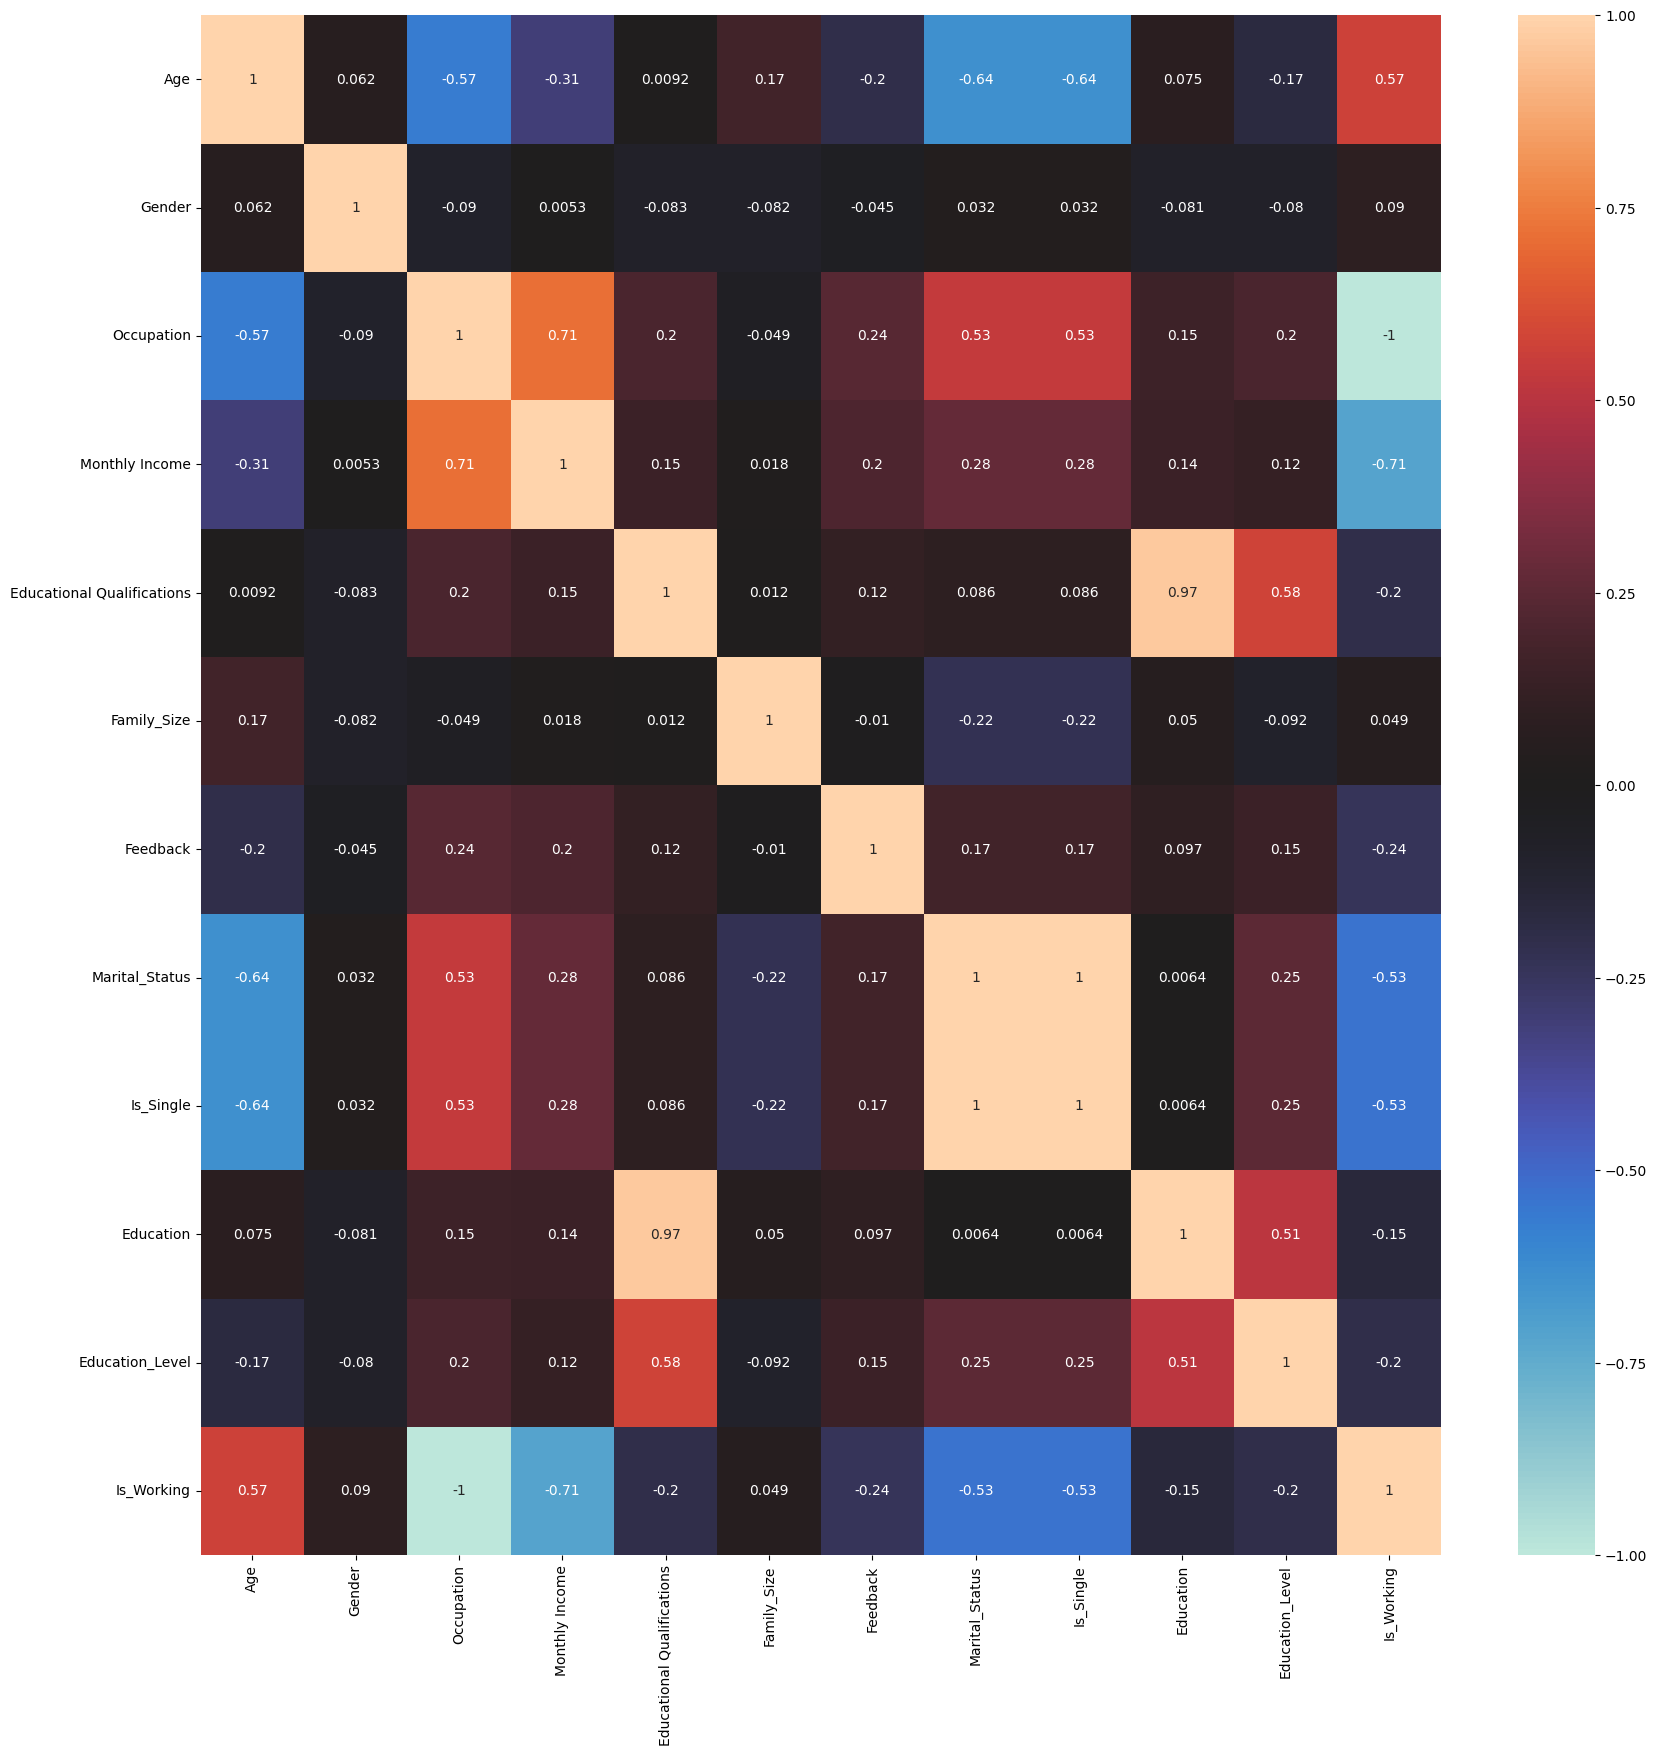

In [124]:
data_numeric = data.select_dtypes(include=[np.number])
corrmat = data_numeric.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, center=0)

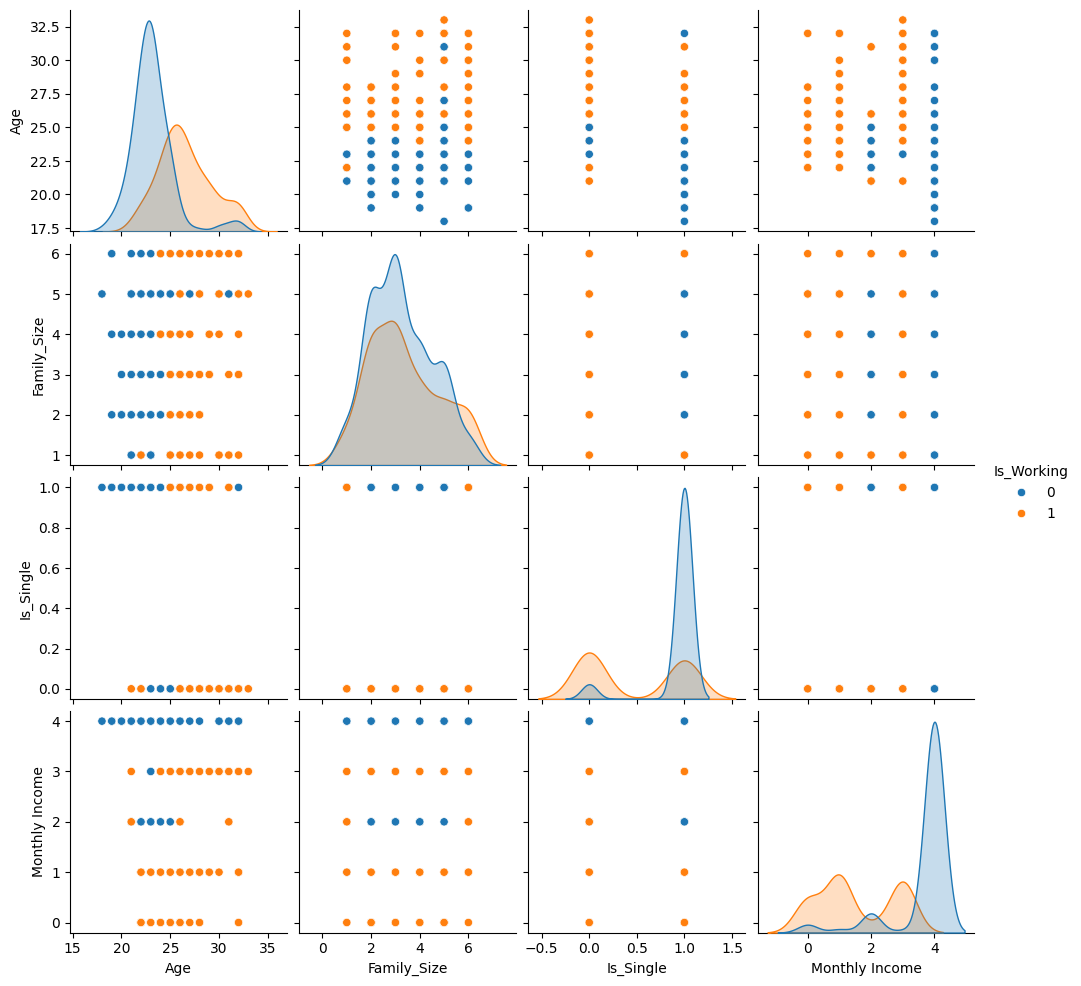

In [125]:
# Asegurémonos de que los nombres de las columnas sean correctos
plot = ["Age", "Family_Size", "Is_Single", "Monthly Income", "Is_Working"]

# Crear el gráfico
sns.pairplot(data[plot], hue="Is_Working")
plt.show()


2. División de datos: Divide el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba. Utiliza el conjunto de entrenamiento para ajustar el modelo y el conjunto de prueba para evaluar su rendimiento.


3. Ajuste del modelo: Utiliza una regresión lineal multivariada para ajustar el modelo a tus datos. Esto implicará ajustar un modelo que relacione las variables dependientes con las variables independientes.


4. Evaluación del modelo: Evalúa el rendimiento del modelo utilizando métricas de evaluación como el coeficiente de determinación (R^2), el error cuadrático medio (MSE) o el error absoluto medio (MAE). Estas métricas te ayudarán a comprender qué tan bien se ajusta el modelo a los datos y si es capaz de predecir con precisión la situación del pedido o el feedback del cliente.


5. Interpretación de resultados: Una vez que hayas ajustado el modelo, interpreta los coeficientes para comprender cómo cada variable independiente influye en la situación del pedido o el feedback del cliente. Esto te ayudará a identificar qué características demográficas y de ubicación tienen el mayor impacto en el comportamiento de pedido de comida en línea.


---


#### 3. Análisis exploratorio de datos (valor = 2.5)

Haz todo un análisis exploratorio de datos sobre este conjunto de datos.Asegúrate de proporcionar la interpretación de cada aspecto tratado en tu análisis y la justificación de las operaciones que hagas.<br>
Objetivo: El objetivo de este análisis es agrupar a los clientes en diferentes segmentos o clústeres basados en sus características demográficas y de ubicación.<br>
